In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.preprocessing import  LabelEncoder
from sklearn.impute import SimpleImputer

from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from zipfile import ZipFile

from sklearn.metrics import plot_confusion_matrix,classification_report,accuracy_score
from sklearn import tree
import warnings
warnings.filterwarnings("ignore")

## Bank Marketing dataset

In [2]:
BankMarketing_Df = pd.read_csv("bank-full.csv",sep=';')
BankMarketing_Df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### EDA

In [3]:
BankMarketing_Df.shape

(45211, 17)

In [4]:
BankMarketing_Df.info() #to show columns, Non-Null and Dtype 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
BankMarketing_Df.isnull().sum() #to shows null values

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
BankMarketing_Df.describe() #Compute pairwise correlation of columns

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


<AxesSubplot:title={'center':'Correlation heatmap'}>

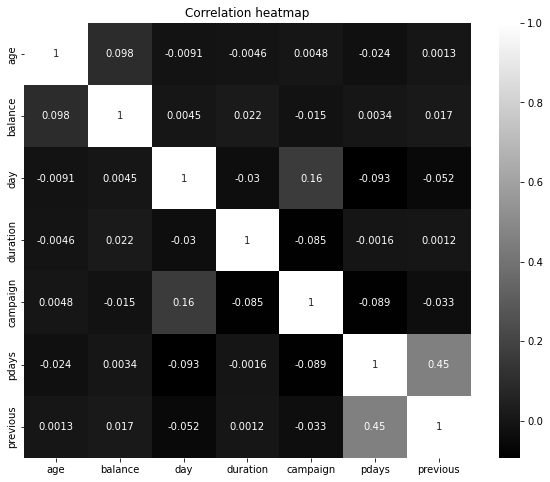

In [7]:
plt.figure(figsize = (10,8))
plt.title("Correlation heatmap")
sns.heatmap(BankMarketing_Df.corr(),annot = True,  cmap = "gray")

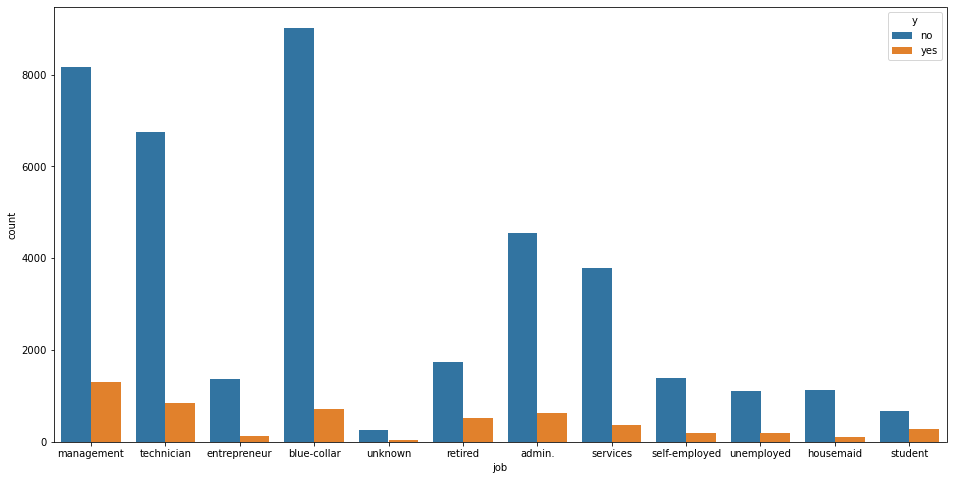

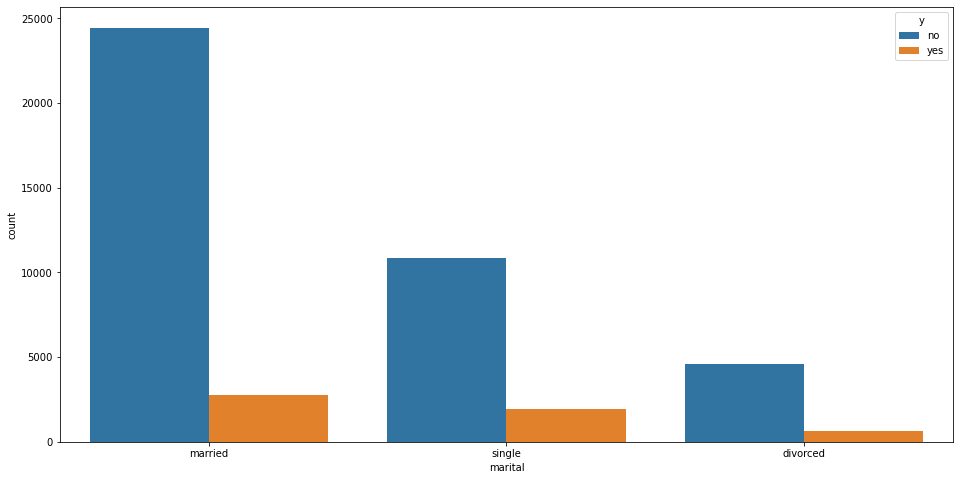

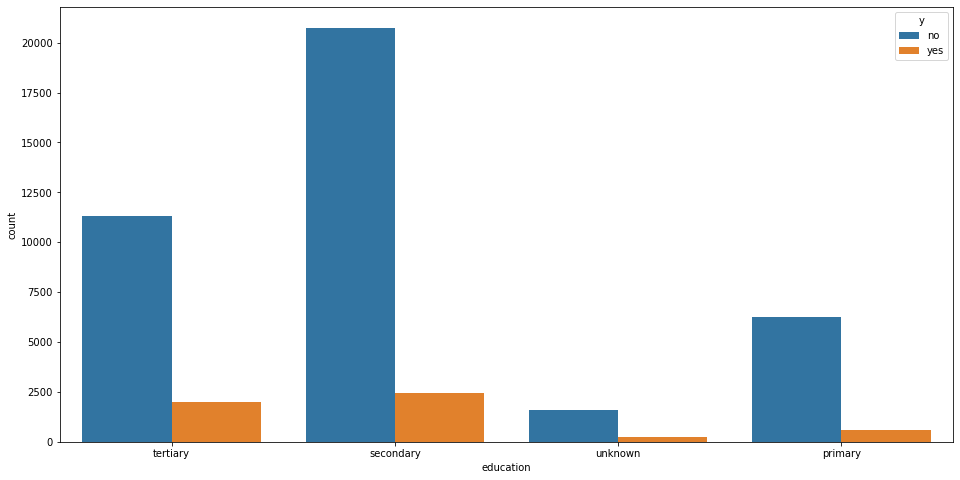

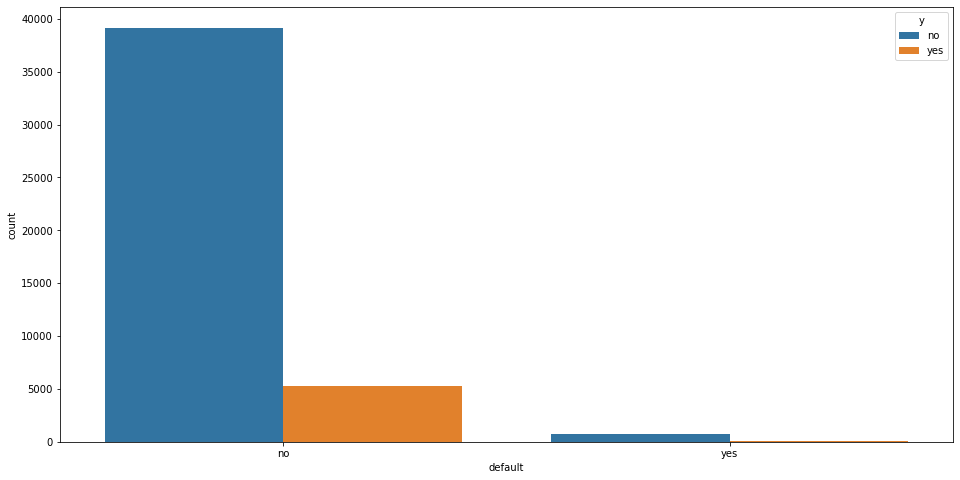

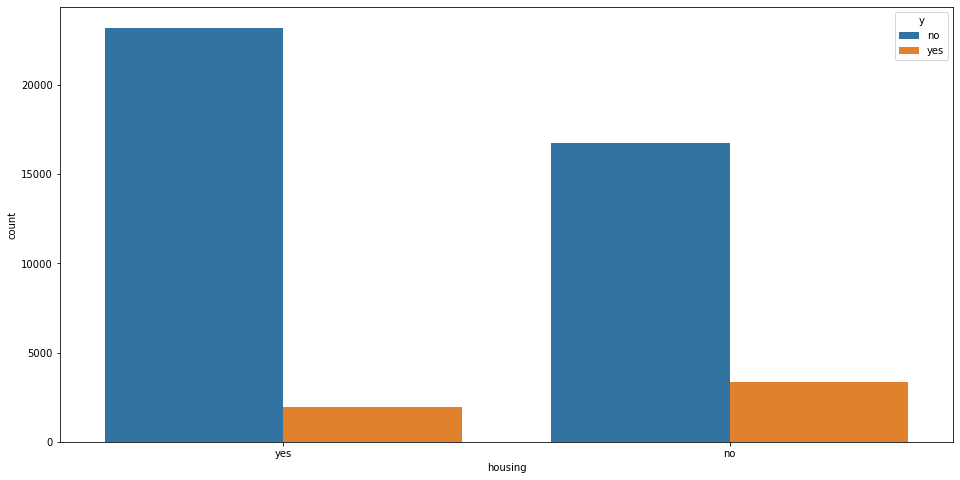

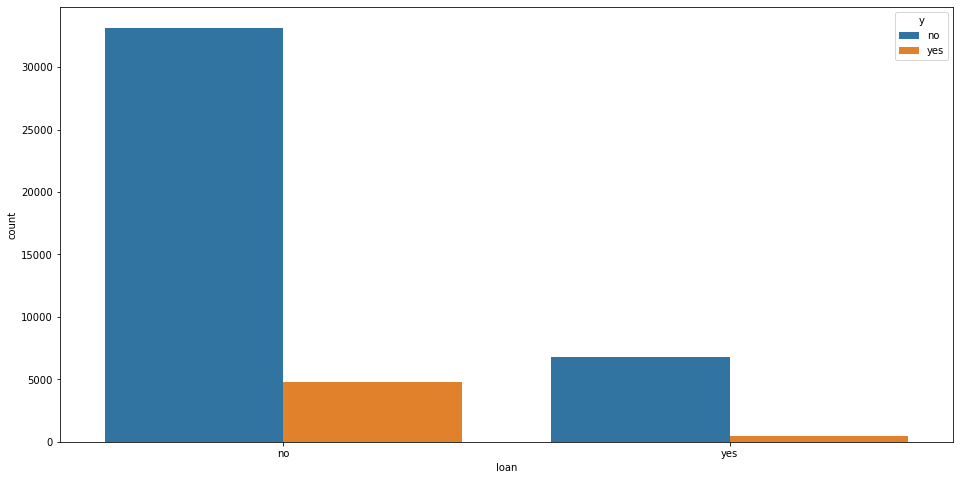

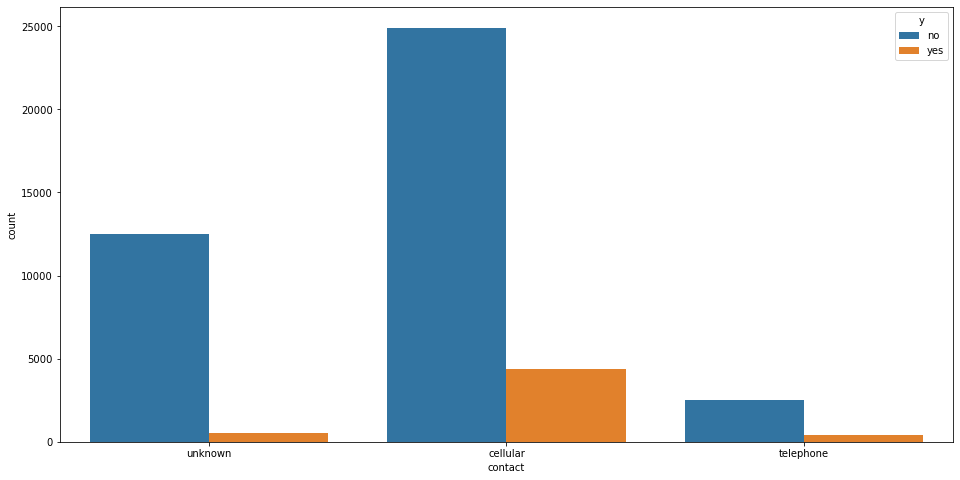

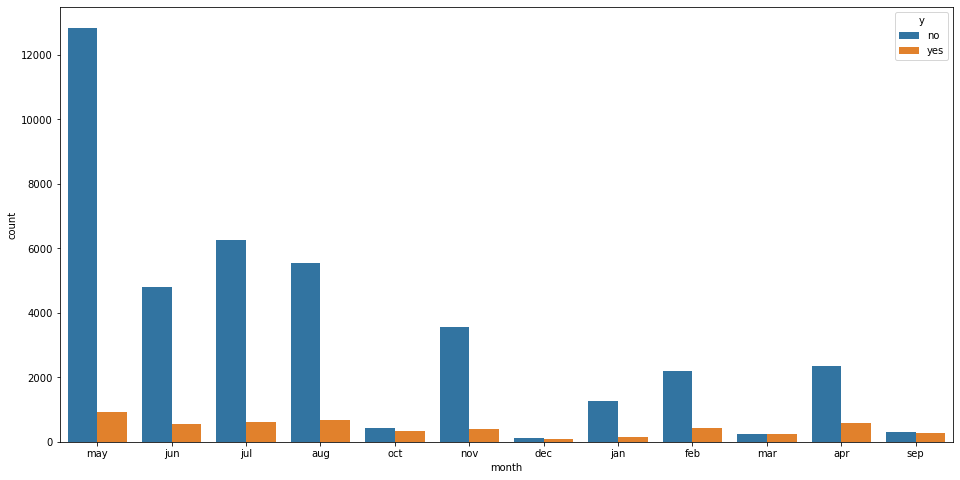

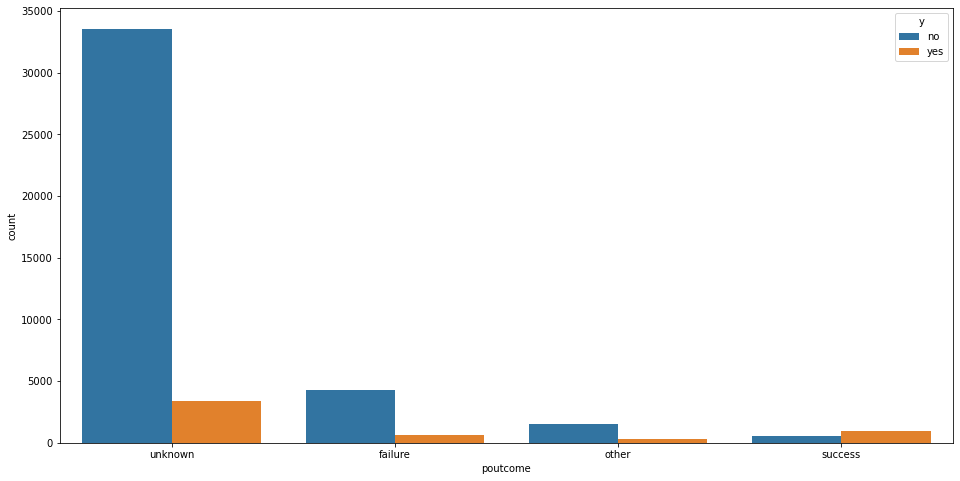

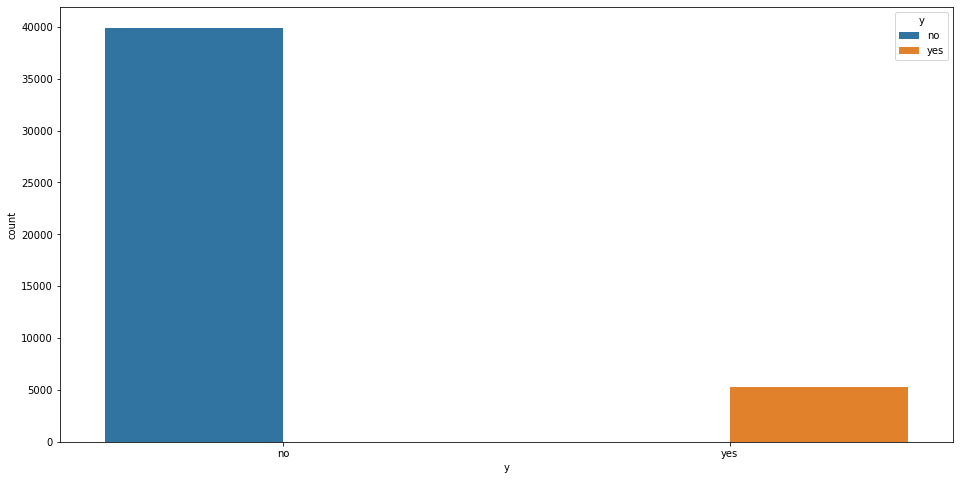

In [8]:
for i in ['job','marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y' ]:
    plt.figure(figsize = (16,8))
    sns.countplot(x = i, data = BankMarketing_Df, hue='y')

In [9]:
# to shows values and their count
for col in BankMarketing_Df.columns:
    print(f"Column name: {col}")
    print(BankMarketing_Df[col].value_counts())

Column name: age
32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64
Column name: job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
Column name: marital
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
Column name: education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
Column name: default
no     44396
yes      815
Name: default, dtype: int64
Column name: balance
 0        3514
 1         195
 2         156
 4         139
 3         134
          ... 
-381         1
 4617        1
 20584       1
 4358        1
 16353       1
Name: balance, Length: 7168,

In [10]:
#split the data
X_train, X_test, Y_train, Y_test = train_test_split(BankMarketing_Df.iloc[:,:-1],BankMarketing_Df.iloc[:,-1], train_size=.80,random_state=42) 

In [11]:
labelEnc = LabelEncoder() #init Label Encoder
for i in ['job','marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome' ]:
    X_train[i] = labelEnc.fit_transform(X_train[i]) #Encode the X_train by fit_transform
    X_test[i] = labelEnc.transform(X_test[i]) #Encode the X_test by transform

Y_train = labelEnc.fit_transform(Y_train) #Encode the y_train by fit_transform
Y_test = labelEnc.transform(Y_test) #Encode the y_test by transform

Accuracy Score for Decision Tree: 0.8735
Classification report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7952
           1       0.48      0.49      0.48      1091

    accuracy                           0.87      9043
   macro avg       0.70      0.71      0.71      9043
weighted avg       0.88      0.87      0.87      9043



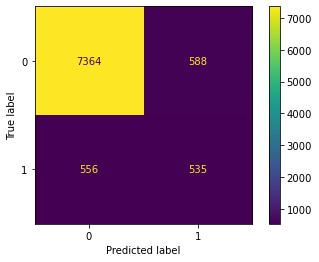

In [12]:
DecisionTree = DecisionTreeClassifier() #init Decision Tree Classifier
DecisionTree.fit(X_train,Y_train) #fit train data
y_pre = DecisionTree.predict(X_test) #predict
print(f"Accuracy Score for Decision Tree: {round(accuracy_score(Y_test,y_pre),4)}")
print("Classification report:")
print(classification_report(Y_test,y_pre))
plot_confusion_matrix(DecisionTree, X_test, Y_test)

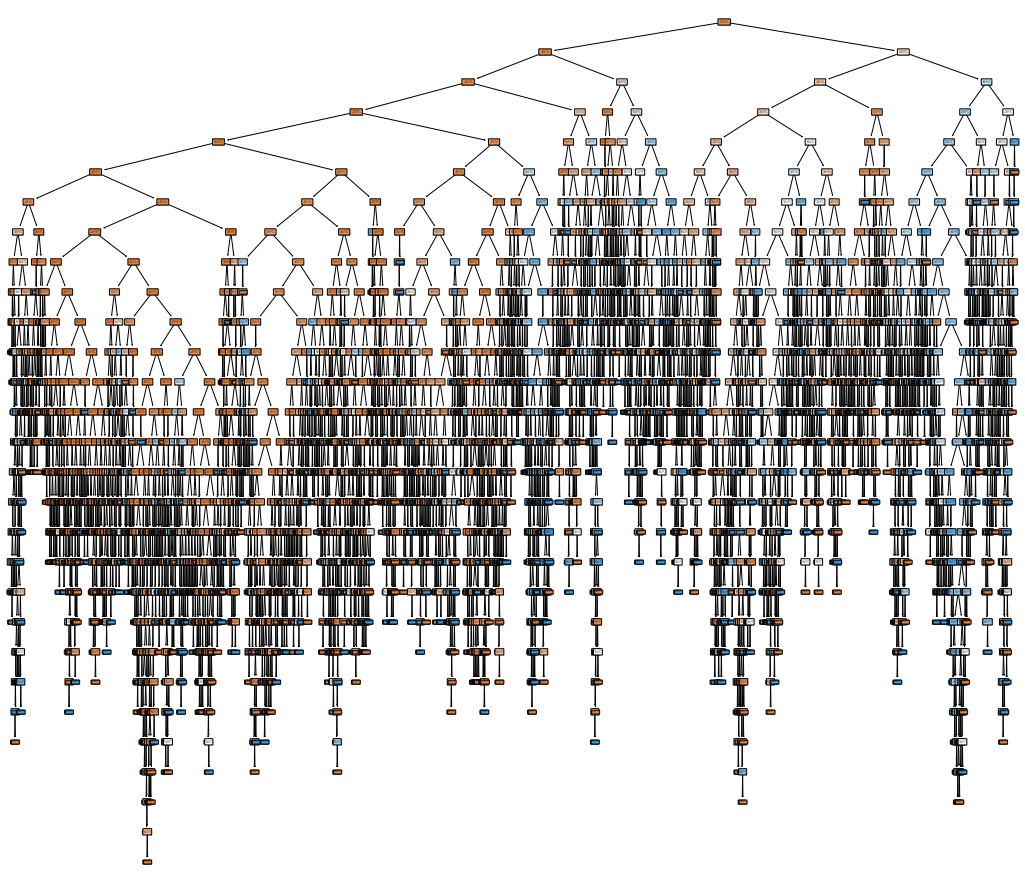

In [13]:
plt.figure(figsize = (18, 16))
tree.plot_tree(DecisionTree,
filled=True,
rounded=True)
plt.show()

Accuracy Score for Random Forest: 0.8959
Classification report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7952
           1       0.62      0.36      0.46      1091

    accuracy                           0.90      9043
   macro avg       0.77      0.67      0.70      9043
weighted avg       0.88      0.90      0.88      9043



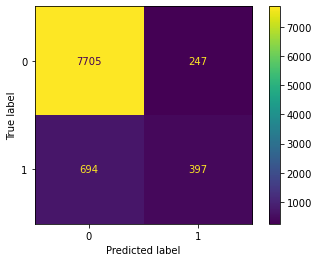

In [14]:
RandomFore = RandomForestClassifier(n_estimators=10, random_state=42 ) #init Random Forest Classifier
RandomFore.fit(X_train, Y_train) #fit the train data
y_pre1 = RandomFore.predict(X_test) #predict
print(f"Accuracy Score for Random Forest: {round(accuracy_score(Y_test,y_pre1),4)}")
print("Classification report:")
print(classification_report(Y_test,y_pre1))
plot_confusion_matrix(RandomFore, X_test, Y_test)

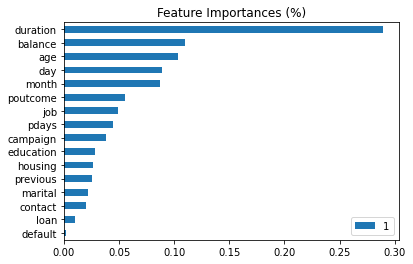

In [15]:
pd.DataFrame(dict(zip(X_train.columns, RandomFore.feature_importances_)), index = [1])\
.T\
.sort_values(1, ascending=True)\
.plot(kind="barh", title="Feature Importances (%)");

In [16]:
RandomFore.get_params().keys() #to show classifier hyperparameter 

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [17]:
HypyerParmter = {
    "n_estimators": [6,7,8,9,10,11,12,13,14,15], 
    "max_depth": [3,4,5,6],
    "criterion": ["gini", "entropy"]}

GridSearch = GridSearchCV(
    RandomFore,
    HypyerParmter,
    cv = 5,
    n_jobs=-1,
    verbose=1) #passing the estimator and the HyperParmeters to GridSearch for the best model

GridSearch.fit(X_train, Y_train) #fit the train data

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=10, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6],
                         'n_estimators': [6, 7, 8, 9, 10, 11, 12, 13, 14, 15]},
             verbose=1)

{'criterion': 'gini', 'max_depth': 6, 'n_estimators': 11}
Accuracy Score for Random Forest: 0.8959
Classification report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      7952
           1       0.76      0.15      0.25      1091

    accuracy                           0.89      9043
   macro avg       0.83      0.57      0.60      9043
weighted avg       0.88      0.89      0.86      9043



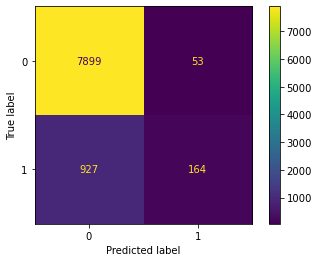

In [18]:
print(GridSearch.best_params_)
y_pre2 = GridSearch.predict(X_test)
print(f"Accuracy Score for Random Forest: {round(accuracy_score(Y_test,y_pre1),4)}")
print("Classification report:")
print(classification_report(Y_test,y_pre2))
plot_confusion_matrix(GridSearch, X_test, Y_test)

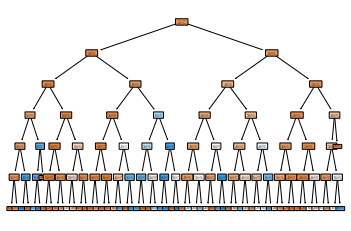

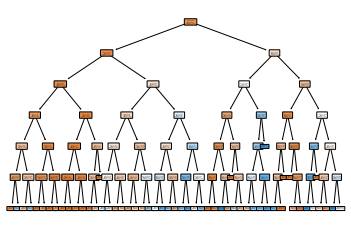

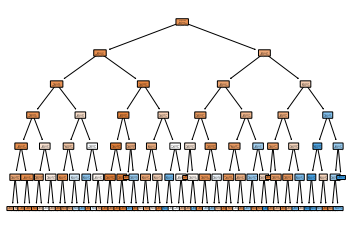

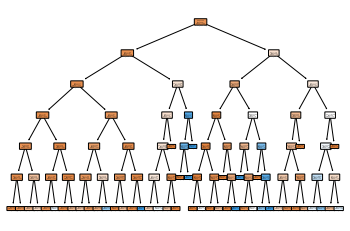

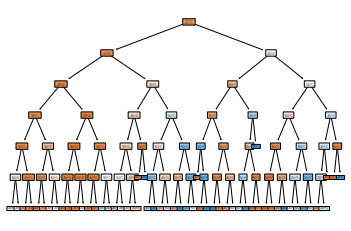

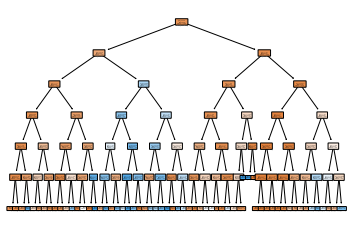

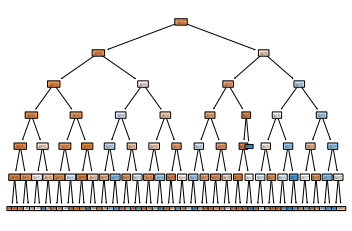

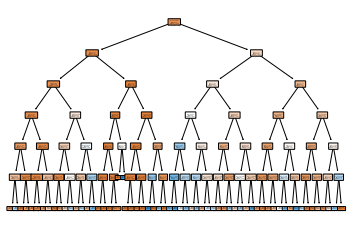

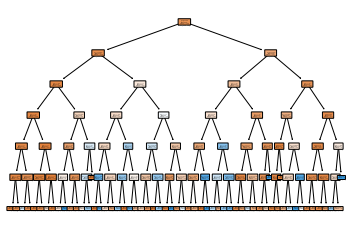

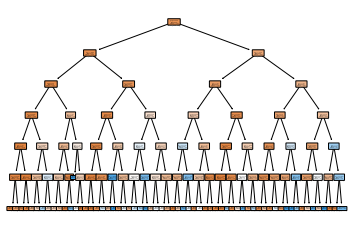

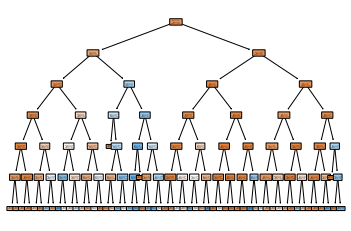

In [19]:
for x in range(len(GridSearch.best_estimator_.estimators_)):
    tree.plot_tree(
    GridSearch.best_estimator_.estimators_[x], 
    filled=True,
    rounded=True,
    )
    plt.show()

## U.S. Pollution Dataset

In [20]:
Pollution_Df = pd.read_csv("pollution_us_2000_2016.csv") #Load the dataset
Pollution_Df.drop('Unnamed: 0',axis=1,inplace=True) #drop index column
Pollution_Df.head()

,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,NO2 Mean,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN
1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN
3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,0.878947,2.2,23,25.0
4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,22.958333,...,Parts per billion,1.958333,3.0,22,4.0,Parts per million,0.850000,1.6,23,NaN


### EDA

In [21]:
Pollution_Df.shape

(1746661, 28)

In [22]:
Pollution_Df.info() #to show columns, Non-Null and Dtype 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746661 entries, 0 to 1746660
Data columns (total 28 columns):
 #   Column             Dtype  
---  ------             -----  
 0   State Code         int64  
 1   County Code        int64  
 2   Site Num           int64  
 3   Address            object 
 4   State              object 
 5   County             object 
 6   City               object 
 7   Date Local         object 
 8   NO2 Units          object 
 9   NO2 Mean           float64
 10  NO2 1st Max Value  float64
 11  NO2 1st Max Hour   int64  
 12  NO2 AQI            int64  
 13  O3 Units           object 
 14  O3 Mean            float64
 15  O3 1st Max Value   float64
 16  O3 1st Max Hour    int64  
 17  O3 AQI             int64  
 18  SO2 Units          object 
 19  SO2 Mean           float64
 20  SO2 1st Max Value  float64
 21  SO2 1st Max Hour   int64  
 22  SO2 AQI            float64
 23  CO Units           object 
 24  CO Mean            float64
 25  CO 1st Max Value  

In [23]:
Pollution_Df.isnull().sum() #to shows null values

State Code                0
County Code               0
Site Num                  0
Address                   0
State                     0
County                    0
City                      0
Date Local                0
NO2 Units                 0
NO2 Mean                  0
NO2 1st Max Value         0
NO2 1st Max Hour          0
NO2 AQI                   0
O3 Units                  0
O3 Mean                   0
O3 1st Max Value          0
O3 1st Max Hour           0
O3 AQI                    0
SO2 Units                 0
SO2 Mean                  0
SO2 1st Max Value         0
SO2 1st Max Hour          0
SO2 AQI              872907
CO Units                  0
CO Mean                   0
CO 1st Max Value          0
CO 1st Max Hour           0
CO AQI               873323
dtype: int64

<AxesSubplot:title={'center':'Correlation heatmap'}>

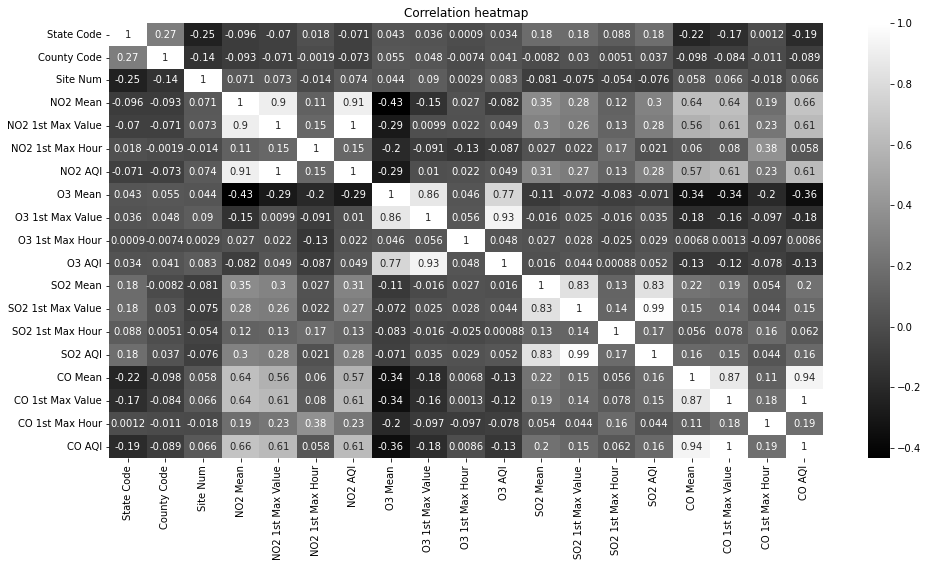

In [24]:
plt.figure(figsize = (16,8))
plt.title("Correlation heatmap")
sns.heatmap(Pollution_Df.corr(), annot=True, cmap='gray')

In [25]:
Pollution_Df['CO AQI'].fillna( 'None' , inplace=True) #fill null by none
Pollution_Df = Pollution_Df[ Pollution_Df['CO AQI'] != 'None' ] #remove none from the target

In [26]:
#split the data
x_train,x_test,y_train,y_test = train_test_split(Pollution_Df.drop('CO AQI', axis=1), Pollution_Df.iloc[:,-1], train_size=.80,random_state=42)

In [27]:
Imput= SimpleImputer(missing_values=np.nan , strategy='most_frequent') #init Simple Imputer with most_frequent strategy
x_train['SO2 AQI'] = Imput.fit_transform(x_train['SO2 AQI'].values.reshape(-1,1))[:,0] #fit_transform for x_train to fill null values
x_test['SO2 AQI'] = Imput.transform(x_test['SO2 AQI'].values.reshape(-1,1))[:,0] #transform for x_test to fill null values

In [28]:
for i in ['Address','State','County','City','Date Local','NO2 Units','O3 Units','SO2 Units','CO Units' ]:
    x_train[i] = labelEnc.fit_transform(x_train[i]) #Encode x_train by fit_transform
    x_test[i] = labelEnc.transform(x_test[i]) #Encode x_test by transform

In [29]:
DecisionTreeReg = DecisionTreeRegressor(max_depth= 4, criterion= 'mse',random_state = 42) #init Decision Tree Regressor

DecisionTreeReg.fit(x_train, y_train) #fit train data

y_pre3 = DecisionTreeReg.predict(x_test) #predict

print( f"R2 Score = {round(r2_score(y_test, y_pre3),4)}")
print(f"Mean absolute error = {round(mean_absolute_error(y_test,y_pre3),4)}")
print(f"Mean squared error = {round(mean_squared_error(y_test,y_pre3),4)}")

R2 Score = 0.9857
Mean absolute error = 0.2654
Mean squared error = 0.4844


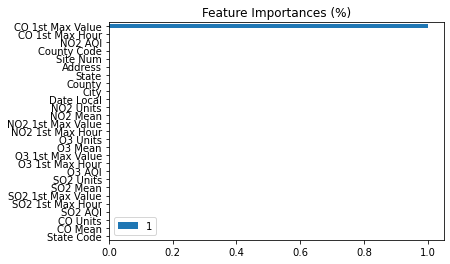

In [30]:
pd.DataFrame(dict(zip(x_train.columns, DecisionTreeReg.feature_importances_)), index = [1])\
.T\
.sort_values(1, ascending=True)\
.plot(kind="barh", title="Feature Importances (%)");

In [31]:
#init Random Forest Regressor
RandomForestReg= RandomForestRegressor(max_depth= 4, criterion= 'mse',random_state = 42)

RandomForestReg.fit(x_train, y_train) #fit train data

y_pre4 = RandomForestReg.predict(x_test) #predict

print( f"R2 Score = {round(r2_score(y_test, y_pre4),4)}")
print(f"Mean absolute error = {round(mean_absolute_error(y_test,y_pre4),4)}")
print(f"Mean squared error = {round(mean_squared_error(y_test,y_pre4),4)}")

R2 Score = 0.9879
Mean absolute error = 0.2509
Mean squared error = 0.4113


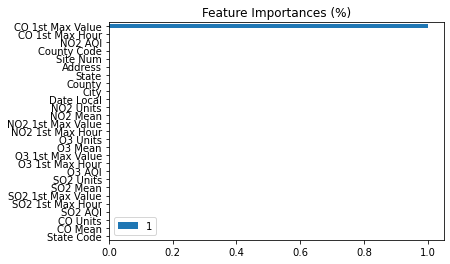

In [32]:
pd.DataFrame(dict(zip(x_train.columns, RandomForestReg.feature_importances_)), index = [1])\
.T\
.sort_values(1, ascending=True)\
.plot(kind="barh", title="Feature Importances (%)");